# Import of the required libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import missingno as msno

Import of the datasets

In [ ]:
df_raw = pd.read_csv("data/King_County_House_prices_dataset.csv")

df_density = pd.read_csv("data/density_kc.csv", delimiter=";")
df_density.head()

,zipcode,population_density,population
0,98164,20629.5,73
1,98174,20391.4,72
2,98121,19576.7,12753
3,98101,17315.9,10803
4,98104,15103.1,13177


## Getting an overview of the datasets

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df_raw.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The date should be in `datetime`-format to allow calculations

In [ ]:
df_raw["date"] = pd.to_datetime(df_raw["date"], format = "%m/%d/%Y")
df_raw

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [22]:
df_houses_feature1 = df_raw.eval("price_sqm = price / sqft_living").round(2)
df_houses_feature1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqm
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.51,-122.26,1340,5650,188.05
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.72,-122.32,1690,7639,209.34
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062,233.77
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.52,-122.39,1360,5000,308.16
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.62,-122.04,1800,7503,303.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.70,-122.35,1530,1509,235.29
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.51,-122.36,1830,7200,173.16
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.59,-122.30,1020,2007,394.22
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.53,-122.07,1410,1287,250.00


In [47]:
df_check = df_houses_feature1[ df_houses_feature1["sqft_basement"] == "?"]
df_check1 = df_check.eval("sqft_basement1 = sqft_living - sqft_above")
df_check1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqm,sqft_basement1
count,4.540000e+02,4.540000e+02,454.000000,454.000000,454.000000,454.000000,454.000000,417.000000,452.000000,454.000000,...,454.000000,454.000000,366.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,4.555794e+09,5.303233e+05,3.403084,2.104075,2052.431718,15670.872247,1.517621,0.009592,0.258850,3.405286,...,1766.607930,1969.903084,114.273224,98081.814978,47.551762,-122.219317,1956.299559,13659.028634,264.755881,285.823789
std,2.898736e+09,3.330030e+05,0.989164,0.790597,897.855170,50029.197716,0.559602,0.097587,0.794542,0.653446,...,797.471819,31.773889,463.833410,52.358006,0.136563,0.146511,664.449227,31810.906918,106.645524,450.946265
min,1.120040e+07,1.025000e+05,1.000000,0.500000,600.000000,681.000000,1.000000,0.000000,0.000000,1.000000,...,600.000000,1900.000000,0.000000,98001.000000,47.190000,-122.460000,740.000000,977.000000,103.200000,0.000000
25%,2.066505e+09,3.207500e+05,3.000000,1.500000,1430.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,...,1162.500000,1944.250000,0.000000,98033.250000,47.460000,-122.330000,1490.000000,5000.000000,187.837500,0.000000
50%,3.883402e+09,4.570000e+05,3.000000,2.250000,1900.000000,7200.000000,1.500000,0.000000,0.000000,3.000000,...,1595.000000,1975.000000,0.000000,98074.000000,47.560000,-122.270000,1800.000000,7211.000000,243.835000,0.000000
75%,7.235076e+09,6.495000e+05,4.000000,2.500000,2510.000000,10481.000000,2.000000,0.000000,0.000000,4.000000,...,2180.000000,1999.000000,0.000000,98118.750000,47.670000,-122.130000,2337.500000,9902.250000,325.715000,560.000000
max,9.834200e+09,3.420000e+06,7.000000,5.500000,6930.000000,881654.000000,3.000000,1.000000,4.000000,5.000000,...,5450.000000,2015.000000,2014.000000,98199.000000,47.770000,-121.360000,4560.000000,438213.000000,810.140000,2620.000000


In [65]:
df_check2 = df_houses_feature1.replace({"?": 0})
df_check2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [73]:
df_houses3 = df_raw(df_raw["yr_renovated"].fillna(method='ffill', axis=0))
df_houses3

TypeError: 'DataFrame' object is not callable

In [66]:
df_check2["yr_renovated"].fillna(0, inplace=True)
df_check2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [61]:
df_check2["sqft_basement"].datetypes()

AttributeError: 'Series' object has no attribute 'datetypes'

In [30]:
df_check = df_houses_feature1.query(["sqft_living"] == df_houses_feature1["sqft_basement"]+df_houses_feature1["sqft_above"])

TypeError: can only concatenate str (not "int") to str

In [27]:
df_houses_feature2 = df_houses_feature1.eval("sqm_ratio = sqft_lot / sqft_living").round(2)
df_houses_feature2 = df_houses_feature2.eval("price_sqm = price / sqft_living").round(2)
df_houses_feature2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqm,sqm_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.51,-122.26,1340,5650,188.05,4.79
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.72,-122.32,1690,7639,209.34,2.82
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.74,-122.23,2720,8062,233.77,12.99
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.52,-122.39,1360,5000,308.16,2.55
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.62,-122.04,1800,7503,303.57,4.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.70,-122.35,1530,1509,235.29,0.74
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.51,-122.36,1830,7200,173.16,2.52
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.59,-122.30,1020,2007,394.22,1.32
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0.0,2004,0.0,98027,47.53,-122.07,1410,1287,250.00,1.49


In [26]:
df_houses_feature2.corr(type="pearson")

TypeError: corr() got an unexpected keyword argument 'type'

<AxesSubplot:xlabel='sqm_ratio', ylabel='price_sqm'>

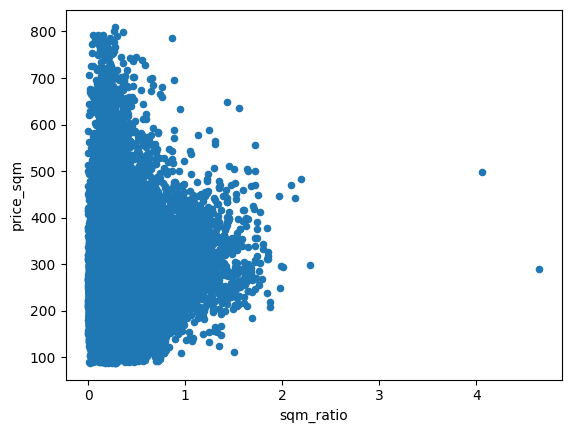

In [25]:
df_houses_feature2.plot(kind="scatter", y="price_sqm", x="sqm_ratio")

## Cleaning the dataset

In [ ]:
df_houses_clean